In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

from sklearn.model_selection import GridSearchCV

XGBoost version: 2.0.3


In [2]:
np.random.seed(12345)

dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

N=4000, N_train=3000, L=4


[-31.608 -29.544   6.773   9.554] 0
[46.451 15.318 24.891 15.357] 1
[ 24.771  46.131 -49.161 -39.356] 1
[-20.13   15.641  30.981  37.218] 1
[46.465 22.369 14.248 21.745] 1


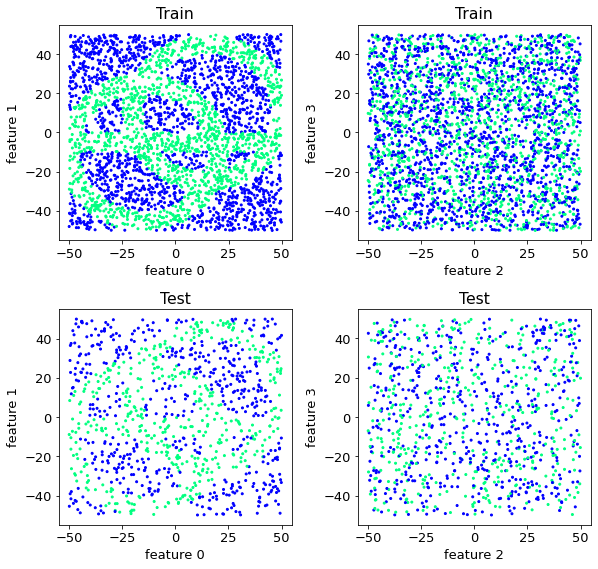

In [3]:
def scat(ax,x,y,i=0,j=1,s=4,title=""):
    ax.scatter(x[:,i],x[:,j],s=s,c=y)
    ax.set_xlabel(f"feature {i}")
    ax.set_ylabel(f"feature {j}")
    ax.set_title(title)

for n in range(5):
    print(x[n],y[n])

fig,AX = plt.subplots(2,2,figsize=(8.5,8.1))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=2,j=3,title="Train")
scat(AX[1,0],x_test,y_test,title="Test")
scat(AX[1,1],x_test,y_test,i=2,j=3,title="Test")
fig.tight_layout()
plt.show()

In [4]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-clf.score(x_test, y_test)),clf.score(x_test, y_test)))
    S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=400, pad_inches=0.02)   
        plt.show()

### Classify
If the “objective” hyperparameter is left unspecified, XGBClassifier looks at the data and chooses automatically the loss functions and the evaluation metrics (--> WARNING)

## XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_api.html

errors: 5.20%   Accuracy=0.948


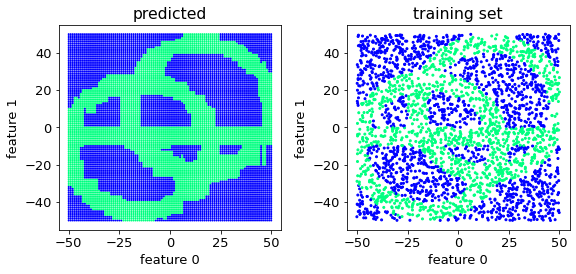

num_trees= 100


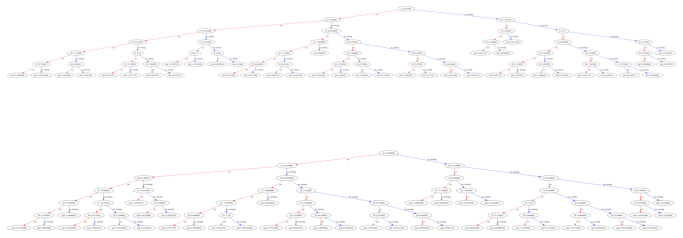

In [5]:
model = XGBClassifier(seed=1,
                      objective='binary:logistic') 
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001, 
       # n_estimators=30)

classify(model, show=True)

None
[0.4891835  0.37623835 0.06590363 0.06867457]


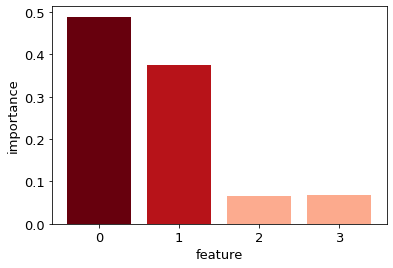

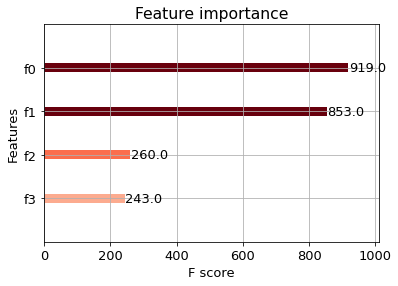

In [6]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# feature importance

print(model.importance_type)
print(model.feature_importances_)
# plot
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: 0.3 + 0.7 * (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,
        color=my_cmap(rescale(model.feature_importances_)))
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(np.arange(L))
plt.title(model.importance_type)
plt.show()

rescale_r = lambda y: 0.3 + 0.7 * (np.max(y) - y) / (np.max(y) - np.min(y))
plot_importance(model,color=my_cmap(rescale_r(model.feature_importances_)))
plt.show()

Documentation: https://xgboost.readthedocs.io/en/stable/python/python_api.html

    ‘weight’: the number of times a feature is used to split the data across all trees.

    ‘gain’: the average gain across all splits the feature is used in.

    ‘cover’: the average coverage across all splits the feature is used in.

    ‘total_gain’: the total gain across all splits the feature is used in.

    ‘total_cover’: the total coverage across all splits the feature is used in.


0 weight [919. 853. 260. 243.]
1 gain [4.56883669 3.5139606  0.61552137 0.64140123]
2 total_gain [4198.76074219 2997.40844727  160.03555298  155.86050415]
3 cover [49.8643837  66.05692291 54.26316071 54.39147949]
4 total_cover [45825.3671875  56346.5546875  14108.421875   13217.12988281]


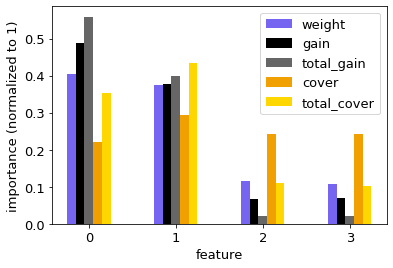

In [7]:
# if the importance type is “total_gain”, then the score is sum of loss change for each split from all trees.
list_type=["weight","gain","total_gain","cover","total_cover"]
list_col=["#7565F0","k","#666666","#F0A000","gold"]

for i,t in enumerate(list_type):
    feature_imp = model.get_booster().get_score(importance_type=t)
    keys = list(feature_imp.keys())
    values = np.array(list(feature_imp.values()))
    print(i,t,values)
    values= values/np.sum(values)
    plt.bar(np.arange(L)+(i-L/2)/10, values,color=list_col[i],width=0.1,label=t)
plt.xlabel("feature")
plt.ylabel("importance (normalized to 1)")
plt.xticks(np.arange(L))
plt.legend()
plt.show()

## normal Gradient Boosting

errors: 19.50%   Accuracy=0.805


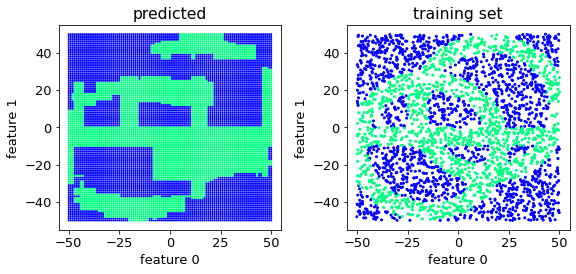

In [8]:
# GradientBoostingClassifier()
classify()

## AdaBoost

/Users/laura/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


errors: 34.10%   Accuracy=0.659


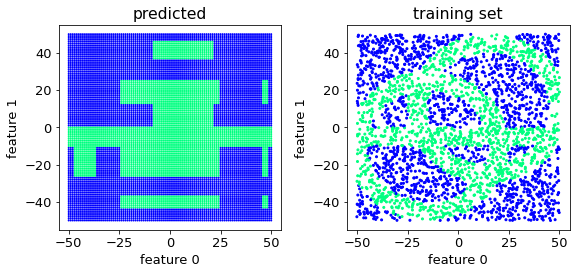

In [9]:
classify(clf=AdaBoostClassifier())

# 1. Model complexity, parameters and regularization

In this section we perform a *grid-search* over different `XGBClassifier` hyperparameters in order to obtain the best validation accuracy. The forementioned hyperparameters we tune are:
* `gamma`: Minimum loss reduction required to make a further partition on a leaf node of the tree

* `learning_rate`: Boosting learning rate

* `max_depth`: Maximum tree depth for base learners

* `min_child_weight`: Minimum sum of instance weight(hessian) needed in a child

* `n_estimators`: Number of boosting rounds

In [49]:
np.linspace(0.05, 0.15, 5)

array([0.05 , 0.075, 0.1  , 0.125, 0.15 ])

In [58]:
params = {'gamma': [0.005, 0.0075, 0.01, 0.0125, 0.015],
          'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15], 
          'max_depth': [20, 22, 24, 26, 28],
          'n_estimators': [90, 100, 110, 120, 130]
          }

# define the xgboost model
model_xgb = XGBClassifier(seed=1,
                      objective='binary:logistic') 

# define the grid search object
grid_search = GridSearchCV(estimator=model_xgb, param_grid=params, cv=4, scoring='accuracy', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 625 candidates, totalling 2500 fits
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=90; total time=   0.7s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=90; total time=   0.4s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=90; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=90; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=100; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=110; total time=   0.3s
[CV] END gamma=0.005, learning_rate=0.05, max_depth=20, n_estimators=110; total time=   0.3s
[CV] END g

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.005, 0.0075, 0.01, 0.0125, 0.015],
                         'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15],
                         'max_depth': [20, 22, 24, 26, 28],
                         'n_estimators': [90, 100, 110, 120, 130]},
             scoring='accuracy', verbose=2)

In [168]:
print(f'The best score obtained is: {grid_search.best_score_:.3f}')
print(f"The best hyperparameters are: \n gamma: {grid_search.best_params_['gamma']} \n learning_rate: {grid_search.best_params_['learning_rate']} \n max_depth: {grid_search.best_params_['max_depth']} \n n_estimators: {grid_search.best_params_['n_estimators']}")

The best score obtained is: 0.939
The best hyperparameters are: 
 gamma: 0.01 
 learning_rate: 0.15 
 max_depth: 22 
 n_estimators: 90


errors: 4.60%   Accuracy=0.954


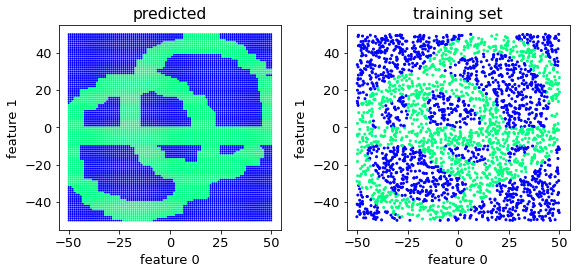

In [60]:
best_model = XGBClassifier(gamma=grid_search.best_params_['gamma'], learning_rate=grid_search.best_params_['learning_rate'],
                           max_depth=grid_search.best_params_['max_depth'], min_child_weight=1,
                           n_estimators=grid_search.best_params_['n_estimators'],
                           seed=1, objective='binary:logistic') 
#best_model.fit(x_train, y_train)
#y_pred = best_model.predict(x_test)
#score = best_model.score(x_test, y_test)

#print(f'accuracy score on the test set: {score}')

classify(best_model, show=False)

The best model for `XGBoost` obtained so far allows to obtain an accuracy on the test set of about 95%.

We then proceed adding the regularization parameter $\lambda$  in order to evaluate whether it is useful for the analysis.

In [125]:
# to understand the utility of regularization
lamb = np.linspace(0, 1, 200)
accs = []   # list of accuracies for each lambda

for l in lamb:
    model = XGBClassifier(gamma=grid_search.best_params_['gamma'], learning_rate=grid_search.best_params_['learning_rate'],
                           max_depth=grid_search.best_params_['max_depth'], min_child_weight=1,
                           n_estimators=grid_search.best_params_['n_estimators'], reg_lambda=l,
                           seed=1, objective='binary:logistic')  
    
    model.fit(x_train, y_train)
    accs.append(model.score(x_test, y_test))

In [126]:
print(f'Best accuracy: {np.max(accs)}')
print(f'best lambda value: {lamb[np.argmax(accs)]:.3f}')

Best accuracy: 0.96
best lambda value: 0.869


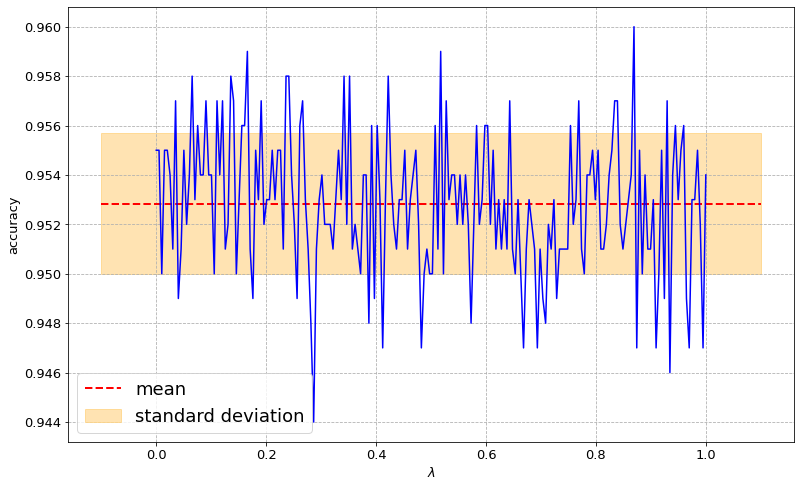

In [163]:
mean = np.mean(accs)
std = np.std(accs)

fig, ax = plt.subplots(figsize=(13, 8))

ax.plot(lamb, accs, c='blue')
ax.hlines(mean, -0.1, 1.1, colors='red', linewidth=2, linestyles='--', label='mean')
ax.fill_between(np.linspace(-0.1, 1.1, 200), np.repeat(mean - std, 200) , np.repeat(mean + std, 200), color='orange', alpha=0.3, label='standard deviation')

ax.grid(True, linestyle='--')

ax.set_xlabel('$\lambda$')
ax.set_ylabel('accuracy')
#ax.set_ylim(0.9, 1)
ax.legend(loc='lower left', fontsize=18)

plt.title('')
plt.show()

From the plot above we can observe that accuracy value doesn't follow a highly visible trend: the value seems to increment in the first part and then, after decreasing, it oscillates around a smaller value. The overall trend is however too noisy to affirm that the application of regularization is useful to improve the performances.